In [112]:
from bs4 import BeautifulSoup
import urllib.request
import json
import csv

In [113]:
res_list = ['ranking', 'name', 'rating', 'reviewCount', 'phone', 'formattedAddress', 'neighborhoods']

In [114]:
for page in range(10):
    url = f'https://www.yelp.com/search?find_desc=ice%20cream&find_loc=New%20York%2C%20NY%2010023&ns=1&start={page*10}'
    ourUrl = urllib.request.urlopen(url)
    soup = BeautifulSoup(ourUrl, 'html.parser')
    data = soup.find_all('script', type='application/json')[1].get_text()
    data_new = data[4:-3]
    data_json = json.loads(data_new)
    for res in range(10):
        info = []
        try:
            result = data_json['searchPageProps']['searchResultsProps']['searchResults'][res+4]['searchResultBusiness']
        except IndexError:
            break
        else:
            for dim in res_list:
                info.append(result[dim])
        with open('ice_cream.csv', mode='a') as icecream_file:
            icecream_writer = csv.writer(icecream_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            icecream_writer.writerow(info)
            

In [115]:
# analysis part
import request
import pandas as pd
%matplotlib inline

In [116]:
info_cream = pd.read_csv('ice_cream.csv',sep=',',names=['ranking','name','rating','reviewCount','phone','address','district'])

In [117]:
info_cream.head()

,ranking,name,rating,reviewCount,phone,address,district
0,1,Van Leeuwen Artisan Ice Cream,4.5,12,(917) 388-2904,1250 6th Ave,['Theater District']
1,2,Emack and Bolio’s,4.0,286,(212) 362-2747,389 Amsterdam Ave,['Upper West Side']
2,3,Van Leeuwen Ice Cream,4.5,23,(646) 368-9195,253 Columbus Ave,['Upper West Side']
3,4,Grom,4.0,594,(212) 974-3444,1796 Broadway,['Midtown West']
4,5,Ample Hills Creamery,4.5,348,(212) 582-9354,600 11th Ave,"[""Hell's Kitchen""]"


In [118]:
info_cream.groupby('district').name.count()

district
["Hell's Kitchen"]      12
['Midtown East']        12
['Midtown West']         9
['Theater District']     9
['Upper East Side']     15
['Upper West Side']     39
[]                       3
Name: name, dtype: int64

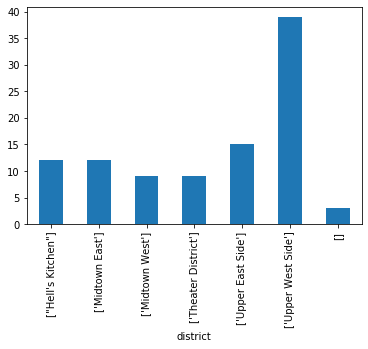

In [119]:
info_cream.groupby('district').name.count().plot(kind='bar')

In [120]:
info_cream.groupby('district').rating.mean()

district
["Hell's Kitchen"]      4.125000
['Midtown East']        3.916667
['Midtown West']        3.888889
['Theater District']    4.000000
['Upper East Side']     3.766667
['Upper West Side']     3.871795
[]                      4.333333
Name: rating, dtype: float64

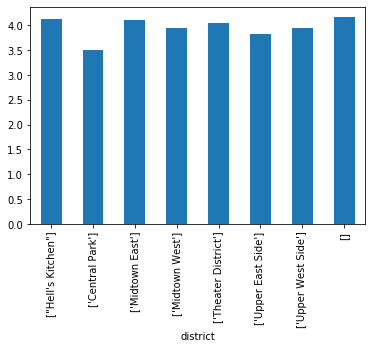

In [108]:
info_cream.groupby('district').rating.mean().plot(kind='bar')